In [1]:
from eeg_preprocessor import EEGPreprocessor
from acc_preprocessor import AccelerometerPreprocessor
from eeg_loader import EEGDataLoader

Drift removal
Bandpass filter
Segment data
Shape after window segmenting: (3, 3456, 300)
Detect peak frequency
Map dominant frequencies to time
Shape after mapping: (3, 100501)
Smooth data
Multiply
Plot data


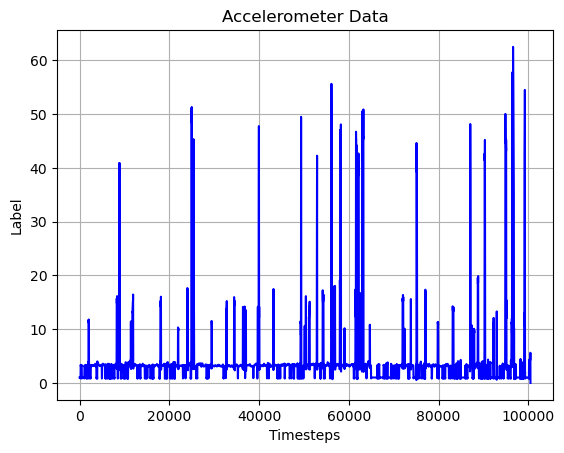

Thresholding
Feature extraction


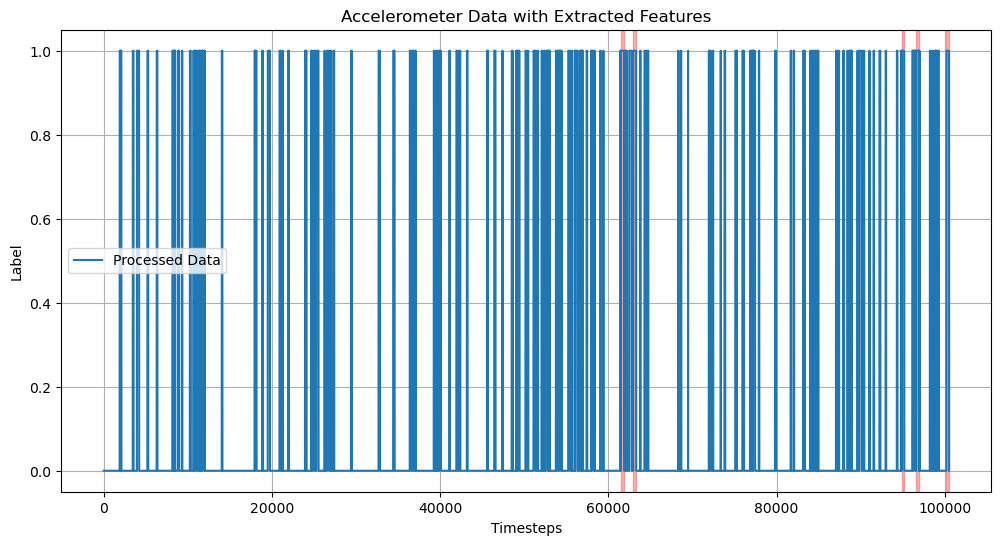

In [12]:
ACC_DATA_PATH = "data/accelerometer_data/820_1_accelerometer.pkl"

acc_loader = AccelerometerPreprocessor(ACC_DATA_PATH, 100)
timestamps = acc_loader.preprocess_data()
# acc_loader.plot_data()
acc_loader.visualize_features()

In [ ]:
# Run this cell if you want to preprocess eeg data
EEG_DATA_PATH = "data/eeg_data/820_1_PD_REST-epo.fif"

# SAVED_TIMESTAMP_PATH = "processed/accelerometer_data/804_1_accelerometer_features.csv"

eeg_loader = EEGPreprocessor(EEG_DATA_PATH)
eeg_loader.preprocess()


eeg_loader.segment_with_labels(timestamps, save=True)  
# eeg_loader.segment_with_labels(SAVED_TIMESTAMP_PATH, save=True)

eeg_loader.plot_epochs()

Opening raw data file data/eeg_data/820_1_PD_REST-epo.fif...
Isotrak not found
    Range : 0 ... 100500 =      0.000 ...   201.000 secs
Ready.
Reading 0 ... 100500  =      0.000 ...   201.000 secs...
Data loaded: <Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 63
 projs: []
 sfreq: 500.0 Hz
>


/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_preprocessor.py:29: RuntimeWarning: This filename (data/eeg_data/820_1_PD_REST-epo.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.data = mne.io.read_raw_fif(self.file_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 3301 samples (6.602 s)

Data filtered successfully
Applying ICA...
Fitting ICA to data using 63 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 20 components
Fitting ICA took 1.9s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 63 PCA components
ICA applied successfully.
Extracted 11 events for segmentation.
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 11 events and 1501 original time points ...
0 bad epochs dropped
Epochs saved successfully as processed/eeg_data/820_1_PD_REST-epo.fif.


/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_preprocessor.py:196: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(self.data, events, event_id=event_id, tmin=tmin, tmax=tmax,


Using pyopengl with version 3.1.6


Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


Reading /Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/processed/eeg_data/819_1_PD_REST-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/processed/eeg_data/801_1_PD_REST-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
78 matching events found
No baseline correction applied
Reading /Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/processed/eeg_data/804_1_PD_REST-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setti

/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_loader.py:41: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  self.epochs = mne.read_epochs(file_path, preload=True)
/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_loader.py:41: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  self.epochs = mne.read_epochs(file_path, preload=True)
/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_loader.py:44: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  self.epochs = mne.concatenate_epochs([self.epochs, mne.read_epochs(file_path, preload=True)])
/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_loader.py:44: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  self.epochs = mne.concatenate_epochs([self.epochs, mne.read_epochs(file_path, preload=True)])
/U

Reading /Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/processed/eeg_data/817_1_PD_REST-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
102 matching events found
No baseline correction applied
Reading /Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/processed/eeg_data/820_1_PD_REST-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
113 matching events found
No baseline correction applied
self.epochs shape: (113, 63, 1501)


/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_loader.py:44: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  self.epochs = mne.concatenate_epochs([self.epochs, mne.read_epochs(file_path, preload=True)])
/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_loader.py:44: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  self.epochs = mne.concatenate_epochs([self.epochs, mne.read_epochs(file_path, preload=True)])
/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_loader.py:44: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  self.epochs = mne.concatenate_epochs([self.epochs, mne.read_epochs(file_path, preload=True)])
/Users/supremegg/Documents/GitHub/parkinsons-tremor-detection/eeg_loader.py:44: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  self.epochs = mne.

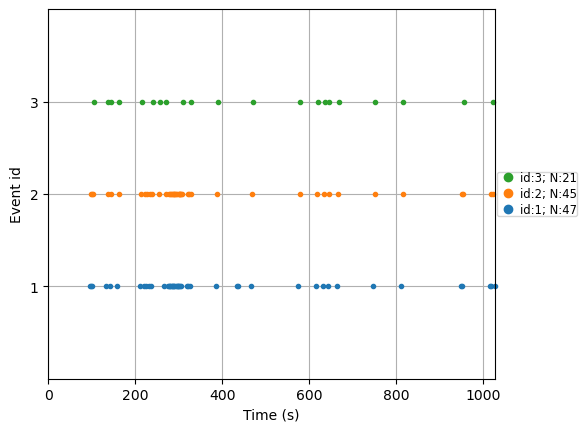


--- Epochs Information ---
Number of epochs: 113
Number of channels: 63
Channel names: ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8']
Sampling frequency: 500.0 Hz
Epoch duration: 3.00 seconds
Time range: 0.00 to 3.00 seconds
Event labels: {'Pre-tremor': 1, 'Tremor': 2, 'Control': 3}
Available event labels: dict_keys(['Pre-tremor', 'Tremor', 'Control'])
-----------------------------

Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


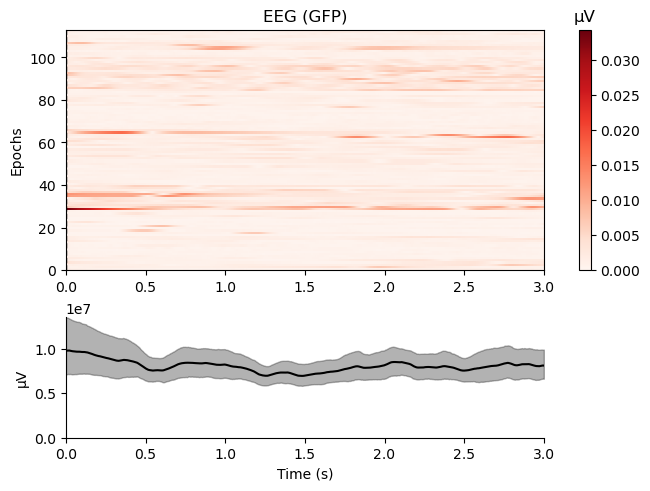

[<Figure size 640x480 with 3 Axes>]

In [14]:
# Run this cell if you already saved processed eeg data
EPOCHS_PATH = "processed/eeg_data/804_1_PD_REST-epo.fif"
FOLDER_PATH = "processed/eeg_data"

eeg = EEGDataLoader(dir_path=FOLDER_PATH)

eeg.plot_events()
eeg.display_info()
eeg.get_labels()
eeg.epochs.plot_image(picks=['eeg'], scalings=dict(eeg=20e-5))

In [15]:
features = eeg.extract_features()

(113, 63)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effective window size : 3.002 (s)
Effe

In [16]:
X_train, X_test, y_train, y_test = eeg.train_test_split()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90, 63, 17) (23, 63, 17) (90,) (23,)
